# Measuring the impact of a speech

In [1]:
# %%

import helpers.potus as corp

import pandas as pd
import numpy as np
import helpers.process as process
from helpers import io as pickle_io
import sys
import datetime
import gc

importing helper functions


In [2]:
import pandas as pd

fname = '/home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/speeches_avg_window_dfr_potus_50t_600_10_klds.pkl'

df = pd.read_pickle(fname)

In [35]:
# best that we remove the n speeches at each end, since they do not have complete metrics

n = 50
e = 962-n

trim_df = df[n:e].copy()

print(trim_df.head())

print(trim_df.tail())


      speaker                   file_name  \
50  jefferson  jefferson_speeches_021.txt   
51  jefferson  jefferson_speeches_020.txt   
52  jefferson  jefferson_speeches_023.txt   
53    madison    madison_speeches_002.txt   
54  jefferson  jefferson_speeches_022.txt   

                                            raw_tuple  \
50  (Proclamation in Response to the Chesapeake Af...   
51  (Seventh Annual Message, 1807-10-27, To the Se...   
52  (Eighth Annual Message, 1808-11-08, <br> TO TH...   
53  (First Inaugural Address, 1809-03-04, Unwillin...   
54  (Message to the Inhabitants of Albemarle Count...   

                                                title       date  \
50  Proclamation in Response to the Chesapeake Affair 1807-07-02   
51                             Seventh Annual Message 1807-10-27   
52                              Eighth Annual Message 1808-11-08   
53                            First Inaugural Address 1809-03-04   
54     Message to the Inhabitants of Albemarle

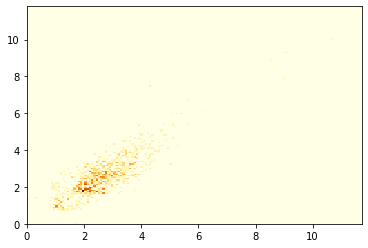

In [36]:
import matplotlib.pyplot as pyplot
import matplotlib.pylab as plt


p = pyplot.hist2d(x=df['novelty'], y=df['transience'], bins=(150, 150), cmap = 'YlOrBr')

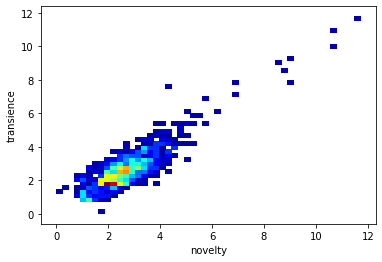

In [37]:
import seaborn as sns
sns.histplot(x=df['novelty'], y=df['transience'], cmap=plt.cm.jet)

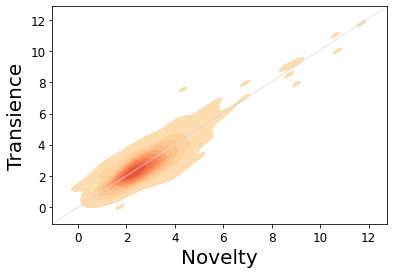

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

cmap = plt.cm.get_cmap('OrRd')

# between 0 and 1, 0 for the leftmost color of the range, 1 for the rightmost, upper > lower
upper_color = 1.0
lower_color = 0.2
num_colors =  15 # len(self.data.columns)
colors = cmap(np.linspace(lower_color, upper_color, num_colors))


b = sns.kdeplot(x=df['novelty'], y=df['transience'], fill=True, colors=colors, thresh=0.015, alpha=1)
b.set_ylabel("Transience",fontsize=20)
b.set_xlabel("Novelty",fontsize=20)
b.tick_params(labelsize=12)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim, y_lim, color = '#dadada', alpha = 0.5)

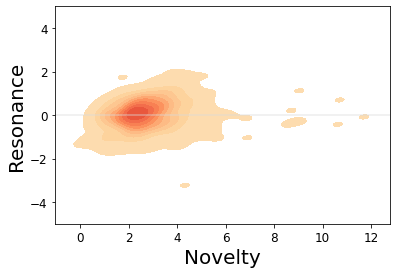

In [39]:
b = sns.kdeplot(x=df['novelty'], y=df['resonance'], fill=True, colors=colors, thresh=0.015, alpha=1)
b.set_ylabel("Resonance",fontsize=20)
b.set_xlabel("Novelty",fontsize=20)
b.tick_params(labelsize=12)
plt.ylim(-5,5)
y_lim = [0,0]
x_lim = plt.xlim()
plt.plot(x_lim, y_lim, color = '#dadada', alpha = 0.5)

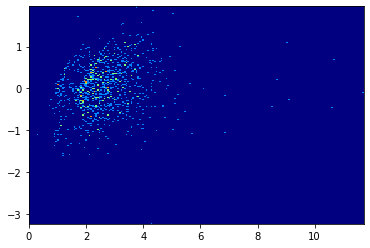

In [40]:
p = pyplot.hist2d(x=df['novelty'], y=df['resonance'], bins=(200, 200), cmap=plt.cm.jet)


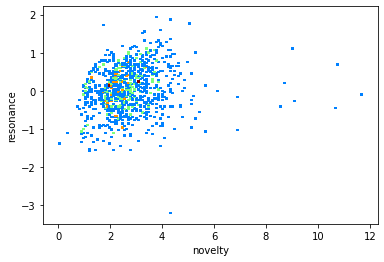

In [21]:
sns.histplot(x=df['novelty'], y=df['resonance'], fill=True, cmap=plt.cm.jet, bins=(150,150))

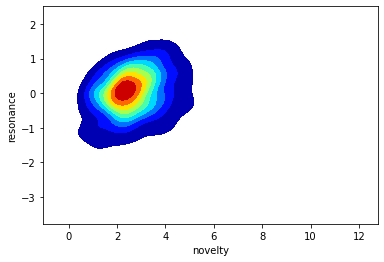

In [22]:
sns.kdeplot(x=df['novelty'], y=df['resonance'], fill=True, cmap=plt.cm.jet)


# From here onwards... various experiments with different ways of displaying and assessing responace metrics

# KEEP IT FOR LATER


## Proposal 1: 

Four quadrants, each representing a type of impact, and a distance from the median to represent the strength of the measure

In [2]:
def whichQuadrant(n, t, n_50, t_50): 

  n = n > n_50
  t = t > t_50

  if n and t:
    q = 'hNhT_shortlived'
  elif n:
    q = 'hNlT_resonant'
  elif t:
    q = 'lNhT_ending'
  else:
    q = 'lNlT_flow'
  return (q)
    

In [6]:
# make a fake df for testing


#from scipy.spatial.distance import cdist
#import numpy as np
#import pandas as pd
#import random

# fake data
#array = [(3.09489631417311, 0.582942380640366), (1.89323512018738, 0.254879631266967), (3.39478426198662, 0.975121895575739), (0.131954874787221, 0.29516477731306), (0.455446609636955, 2.02005518319647), (0.862055947876944, 0.118108104398488), (1.37328693241597, 1.5842017215469), (0.403657489695134, 0.787856941632538), (1.94972212790814, 0.0193776630144199), (1.42210150446108, 2.86995485609879), (1.89419738795409, 0.48255891277842), (1.96797575929161, 0.58796827335421), (0.525222233009016, 1.21497245584538), (0.20475673866358, 2.31232599669092), (0.270186107971087, 0.114720899899513), (1.24478135207329, 1.56999165780057), (1.38820421800893, 0.191632637651829), (0.00290224740057211, 0.918138498889922), (0.911410714923022, 1.0371644198529), (0.288706004549853, 2.33904209834485), (1.16637994921893, 0.0535413825679699), (1.53737092252591, 2.55499480578174), (0.888463113867756, 0.319889221061646), (2.73240831273081, 2.63006280670163), (0.0374460485962226, 0.152054089279477), (0.967272805433058, 0.341561440141513), (0.356298494773474, 0.446615196706775), (2.30647658202255, 0.551268049477479), (1.56897537391303, 0.0219585516154205), (0.266692778911153, 0.0117776973593027), (1.24119293149866, 0.572344750742452), (0.400074781449386, 3.34948242054643), (1.25851730041176, 1.11447052476381), (0.482069909072815, 0.684878068356402), (0.139659798650414, 0.618916154778072), (1.16608883950084, 0.306818098821719), (0.184424691585236, 0.0549241473530484), (0.407544152365194, 0.532780494769973), (0.00327835347134679, 1.07361876167349), (0.304725616979394, 0.965043894093231), (3.07225726009717, 0.182059835231864), (0.937341116430549, 1.69332214003401), (0.755928316108864, 1.50699569628252), (0.00217667321758915, 0.694123868138978), (0.316918815179041, 1.62482696296295), (0.677800276097981, 1.0763996687556), (0.0724119516417585, 0.116029292196778), (0.519980645764413, 0.803254330104196), (1.41483120602504, 0.677119058907597), (0.0180474008587901, 0.97380456179083), (0.513742072946714, 0.0364692519893132), (0.104963770154495, 2.58084965675961), (0.15902302971777, 1.29128077482184), (1.6384461312324, 0.930815572056261), (1.09536191014328, 0.951064069046806), (0.74707322992946, 2.1118389424644), (0.041649594451474, 0.140280842540543), (0.786085273449117, 0.464106974785531), (2.8134552595159, 1.29716126756847), (1.89117144116722, 3.00253243426067), (0.346636889146523, 0.243617740972532), (2.14695218237879, 2.80405629761809), (1.10572150157338, 2.09067282236357), (0.426579767017728, 1.95459362572357), (0.518979416688769, 0.322146895254425), (1.29233400584083, 0.500602967096445), (0.0721999158088876, 2.69489761492292), (0.451166238360507, 0.97753374752404), (3.29628921111525, 1.18983767644147), (1.36006419122543, 0.140139144816723), (1.40577238831851, 1.22106011147033), (0.149408549582453, 0.682383879467251), (0.843106916919855, 1.74104522360883), (0.172289620653067, 2.75914542748868), (1.65603018095955, 1.09270685091369), (0.888777796850306, 2.8026600700486), (0.373029205577724, 1.98009439367903), (0.00782371706987301, 3.28208148709799), (3.02099213539077, 2.20754317763732), (1.58294272133189, 1.84733501708562), (1.36208391762114, 2.76761435593808), (0.386021620306881, 1.3018122104497), (0.889774103967363, 0.198245417029601), (1.9674258437388, 0.444170390070319), (2.94557069840714, 1.42869178556894), (2.64482324824439, 0.428268906166751), (0.906851938523369, 0.201973078249868), (2.03751627579881, 0.576837803595763), (0.0694344014956747, 0.251006198025895), (1.91538394636557, 0.220732578337025), (1.03752599227736, 0.0982465143227159), (2.84009194408339, 0.257343008620609), (1.35902795801654, 0.658019385856038), (0.478487695042466, 0.706482540306176), (1.24927778932338, 0.913588586880767), (0.2921920624563, 0.0587601642061468), (0.845994343113662, 1.03472427849463), (0.947121738100888, 1.72144811053148), (0.960653365706374, 0.841851182739559), (1.89492512436055, 0.25261058862734), (0.816827537306552, 1.97685719886936), (2.1449653947829, 1.11327308758533), (0.914864259170633, 0.00912764867757045), (0.355056317699421, 1.90080889365944), (3.10572934889499, 0.547654569932173), (1.50340301306364, 0.92467392023664), (2.25202555370745, 1.64332580540294), (0.146972087560615, 0.625348413353285), (0.501670405293217, 2.40695319893031), (3.51946672276268, 1.68761715986951), (2.29928178322651, 1.50212613601114), (0.616558869125566, 1.01639335614926), (3.13910834566821, 0.238534715101568), (0.201091635291765, 0.78912700006107), (0.606878122058399, 3.6477880591434), (0.596609091037207, 0.2972400091663)]

#fake party data
#party_list = ['ALP', 'LP', 'Nat', 'AG', 'IND','ALP', 'LP','ALP', 'LP','ALP', 'LP','ALP', 'LP','ALP', 'LP','ALP', 'LP','ALP', 'LP', 'AG', 'Nat', 'Nat']
#party = [random.sample(party_list, 1)[0] for p in array]

# make Novelty and Transience
#Ns = [p[0] for p in array]
#Ts = [p[1] for p in array]
#Rs = [p[0] - p[1] for p in array]

# fake df
#df = pd.DataFrame({'novelty': Ns,
#                   'transience': Ts,
#                   'resonance': Rs,
#                   'party': party})




In [7]:
# NAH...
# Let's use real data now





In [13]:
df.head()

,speaker,file_name,file_path,raw_tuple,title,date,speech,speech_len,probs,token_count,novelty,transience,resonance
0,washington,washington_speeches_000.txt,/home/azureuser/cloudfiles/code/data/raw/potus...,"(First Inaugural Address, 1789-04-30, Fellow C...",First Inaugural Address,1789-04-30,Fellow Citizens of the Senate and the House of...,8687,"[0.04419251, 8.79e-06, 0.0080008, 9.042e-05, 3...",1256,0.000000,1.460507,-1.460507
1,washington,washington_speeches_004.txt,/home/azureuser/cloudfiles/code/data/raw/potus...,"(Thanksgiving Proclamation, 1789-10-03, Wherea...",Thanksgiving Proclamation,1789-10-03,Whereas it is the duty of all Nations to ackno...,2541,"[0.07815806, 2.655e-05, 0.00052114, 0.0002731,...",960,0.919370,2.285939,-1.366568
2,washington,washington_speeches_003.txt,/home/azureuser/cloudfiles/code/data/raw/potus...,"(First Annual Message to Congress, 1790-01-08,...",First Annual Message to Congress,1790-01-08,Fellow Citizens of the Senate and House of Rep...,5278,"[0.02640794, 1.403e-05, 0.00027538, 0.00014431...",900,0.990080,0.968736,0.021344
3,washington,washington_speeches_001.txt,/home/azureuser/cloudfiles/code/data/raw/potus...,"(Second Annual Message to Congress, 1790-12-08...",Second Annual Message to Congress,1790-12-08,Fellow citizens of the Senate and House of Rep...,8383,"[0.00028747, 8.45e-06, 0.00656374, 8.691e-05, ...",271,1.153165,0.977333,0.175833
4,washington,washington_speeches_002.txt,/home/azureuser/cloudfiles/code/data/raw/potus...,(Talk to the Chiefs and Counselors of the Sene...,Talk to the Chiefs and Counselors of the Senec...,1790-12-29,"I the President of the United States, by my ow...",7898,"[0.00035553, 1.044e-05, 0.00020499, 0.00010742...",607,1.707379,2.116694,-0.409315


In [15]:
import numpy as np
from scipy.spatial.distance import cdist

# identify quadrants
n_50 = np.quantile(df['novelty'], 0.5)
t_50 = np.quantile(df['transience'], 0.5)
mid_point = [(n_50, t_50)]
print(mid_point)

df['quadrant'] = [whichQuadrant(row['novelty'], row['transience'], n_50, t_50) for idx,row in df.iterrows()]


# calculate distance
df['distance'] = np.array([cdist(mid_point, [(row['novelty'], row['transience'])], 'euclidean')[0][0] for idx,row in df.iterrows()])

# identify those of interest
quantile_of_interest = 0.75
threshold_of_interest = {'hNlT_resonant': np.quantile(df['distance'][df['quadrant'] == 'hNlT_resonant'], quantile_of_interest),
                         'hNhT_shortlived': np.quantile(df['distance'][df['quadrant'] == 'hNhT_shortlived'], quantile_of_interest),
                         'lNlT_flow': 100,
                         'lNhT_ending': np.quantile(df['distance'][df['quadrant'] == 'lNhT_ending'], quantile_of_interest)}
print(threshold_of_interest)

df['quadrant_threshold_of_interest'] = [threshold_of_interest[q] for q in df['quadrant']]


df.head(20)


[(2.7202941179275513, 2.5985554456710815)]
{'hNlT_resonant': 0.7488370605303593, 'hNhT_shortlived': 2.2205387095674336, 'lNlT_flow': 100, 'lNhT_ending': 0.6910716538400353}


,speaker,file_name,file_path,raw_tuple,title,date,speech,speech_len,probs,token_count,novelty,transience,resonance,quadrant,distance,quadrant_threshold_of_interest
0,washington,washington_speeches_000.txt,/home/azureuser/cloudfiles/code/data/raw/potus...,"(First Inaugural Address, 1789-04-30, Fellow C...",First Inaugural Address,1789-04-30,Fellow Citizens of the Senate and the House of...,8687,"[0.04419251, 8.79e-06, 0.0080008, 9.042e-05, 3...",1256,0.000000,1.460507,-1.460507,lNlT_flow,2.948755,100.000000
1,washington,washington_speeches_004.txt,/home/azureuser/cloudfiles/code/data/raw/potus...,"(Thanksgiving Proclamation, 1789-10-03, Wherea...",Thanksgiving Proclamation,1789-10-03,Whereas it is the duty of all Nations to ackno...,2541,"[0.07815806, 2.655e-05, 0.00052114, 0.0002731,...",960,0.919370,2.285939,-1.366568,lNlT_flow,1.827856,100.000000
2,washington,washington_speeches_003.txt,/home/azureuser/cloudfiles/code/data/raw/potus...,"(First Annual Message to Congress, 1790-01-08,...",First Annual Message to Congress,1790-01-08,Fellow Citizens of the Senate and House of Rep...,5278,"[0.02640794, 1.403e-05, 0.00027538, 0.00014431...",900,0.990080,0.968736,0.021344,lNlT_flow,2.376963,100.000000
3,washington,washington_speeches_001.txt,/home/azureuser/cloudfiles/code/data/raw/potus...,"(Second Annual Message to Congress, 1790-12-08...",Second Annual Message to Congress,1790-12-08,Fellow citizens of the Senate and House of Rep...,8383,"[0.00028747, 8.45e-06, 0.00656374, 8.691e-05, ...",271,1.153165,0.977333,0.175833,lNlT_flow,2.254829,100.000000
4,washington,washington_speeches_002.txt,/home/azureuser/cloudfiles/code/data/raw/potus...,(Talk to the Chiefs and Counselors of the Sene...,Talk to the Chiefs and Counselors of the Senec...,1790-12-29,"I the President of the United States, by my ow...",7898,"[0.00035553, 1.044e-05, 0.00020499, 0.00010742...",607,1.707379,2.116694,-0.409315,lNlT_flow,1.121689,100.000000
5,washington,washington_speeches_007.txt,/home/azureuser/cloudfiles/code/data/raw/potus...,"(Third Annual Message to Congress, 1791-10-25,...",Third Annual Message to Congress,1791-10-25,"I meet you, upon the present occasion, with th...",13965,"[0.01726666, 5.18e-06, 0.02395631, 5.333e-05, ...",836,1.080824,0.951652,0.129171,lNlT_flow,2.323823,100.000000
6,washington,washington_speeches_006.txt,/home/azureuser/cloudfiles/code/data/raw/potus...,"(Veto Message on Congressional Redistricting, ...",Veto Message on Congressional Redistricting,1792-04-05,Gentlemen of the House of Representatives: I h...,991,"[0.00229693, 6.769e-05, 0.00132877, 0.00069634...",537,4.062692,4.706109,-0.643416,hNhT_shortlived,2.498762,2.220539
7,washington,washington_speeches_005.txt,/home/azureuser/cloudfiles/code/data/raw/potus...,"(Fourth Annual Message to Congress, 1792-11-06...",Fourth Annual Message to Congress,1792-11-06,"Fellow-Citizens of the Senate, and of the Hous...",14254,"[0.00420348, 4.94e-06, 0.0246952, 0.01343063, ...",126,1.594731,1.091092,0.503640,lNlT_flow,1.881313,100.000000
8,washington,washington_speeches_008.txt,/home/azureuser/cloudfiles/code/data/raw/potus...,(Proclamation Against Crimes Against the Chero...,Proclamation Against Crimes Against the Cherok...,1792-12-12,"Whereas I have received authentic information,...",1145,"[0.00185744, 5.457e-05, 0.00107109, 0.04349534...",553,2.260842,2.302155,-0.041314,lNlT_flow,0.546763,100.000000
9,washington,washington_speeches_009.txt,/home/azureuser/cloudfiles/code/data/raw/potus...,"(Second Inaugural Address, 1793-03-04, Fellow-...",Second Inaugural Address,1793-03-04,Fellow-Citizens:\nI am again called upon by th...,791,"[0.00296846, 8.729e-05, 0.00171334, 0.00089787...",1227,4.649143,4.711119,-0.061976,hNhT_shortlived,2.860661,2.220539


## Proposal 2: 

Measure each speech using two metrics: (a) the angle from SW (ie how far around from an 'inconsequential' vector heading to (0,0), and (b) the distance from median.

In [17]:
# Proposal 2
# Measure each speech using two metrics: (a) distance from median and (b) angle from north (or should it be from SW???)

def angle_of_speech(n, t, n_50, t_50):

  import numpy as np
  import math

  vector_2 = [-1 * n_50, -1 * t_50]
  vector_1 = [n - n_50, t - t_50]

  dot = vector_1[0]*vector_2[0] + vector_1[1]*vector_2[1]
  det = vector_1[0]*vector_2[1] - vector_1[1]*vector_2[0]
  r = math.atan2(det, dot)
  degrees = np.rad2deg(r)
  if degrees < 0:
    degrees = 360 + degrees

  return (degrees)



In [19]:
print(angle_of_speech(3, 0.2, 0.9, 0.9))
print(angle_of_speech(0.85, 2.8, 0.9, 0.9))
print(angle_of_speech(2.3, 0.6, 0.9, 0.9))
print(angle_of_speech(0.5, 0, 0.9, 0.9))

243.43494882292202
133.49256424122504
237.0947570770121
338.9624889745782


# Charting speeches 

## Highlighting the top x% in each quadrant (proposal 1) but could be adapted to proposal 2 to look at the top x% of everything between a range - maybe 90-270.


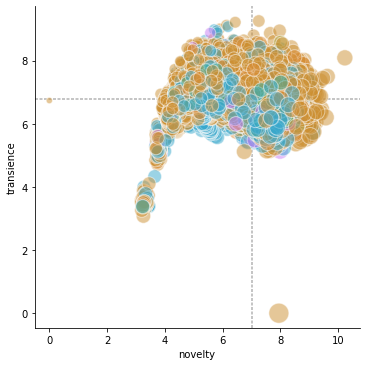

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

#party_colours = {'LP': 'blue', 'ALP': 'red', 'AG': 'green', 'Nat': 'brown', 'grey': 'grey', 'IND': 'purple'}

# Use the 'hue' argument to provide a factor variable
sns.relplot(x="novelty", y="transience", data=df, alpha=0.5, #hue='chart_colour', palette = party_colours,
            size="resonance", sizes = (40,400),
            legend=False)

plt.axvline(x = n_50, color=".7", dashes=(2, 1), zorder=0)
import matplotlib.pyplot as pyplot
import matplotlib.pylab as plt

p = pyplot.hist2d(x=df['novelty'], y=df['transience'], bins=(200, 200), cmap=plt.cm.jet)

In [ ]:
for s in df.nsmallest(20, 'novelty')['text']:
    print(s)
    
    

In [ ]:
# top twenties

for idx,row in df.nlargest(20, 'resonance').iterrows():
    print(row['date_time'], row['name'], row['party'], row['text'][:2000])



In [ ]:

df[df['quadrant']=='hNlT_resonant'].nlargest(20, 'distance')


In [17]:
import pandas as pd

fname = '~/cloudfiles/code/data/processing/hansard/experiment/eval_num_topics_3/speeches_df_43par_eval_num_topics_3_klds_1500_1500.pkl'

df = pd.read_pickle(fname)

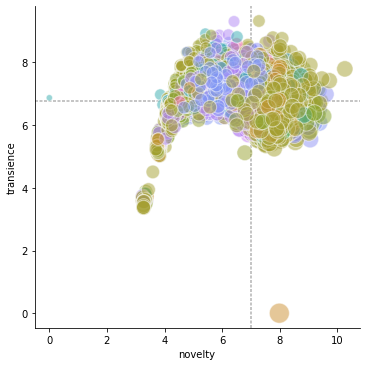

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

party_colours = {'LP': 'blue', 'ALP': 'red', 'AG': 'green', 'Nat': 'brown', 'grey': 'grey', 'IND': 'purple'}

# Use the 'hue' argument to provide a factor variable
sns.relplot(x="novelty", y="transience", data=df, hue='context_type', alpha=0.5, #palette = party_colours,
            size="resonance", sizes = (40,400),
            legend=False)

plt.axvline(x = n_50, color=".7", dashes=(2, 1), zorder=0)
plt.axhline(y = t_50, color=".7", dashes=(2, 1), zorder=0)

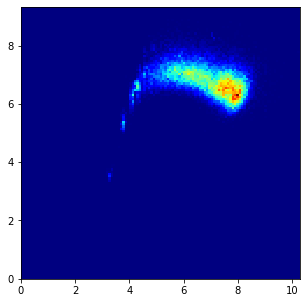

In [24]:
import matplotlib.pyplot as pyplot
import matplotlib.pylab as plt

plt.figure(figsize=(5,5))
plt.ylim(0,10)
plt.xlim(0,10)

p = pyplot.hist2d(x=df['novelty'], y=df['transience'], bins=(120, 120), cmap=plt.cm.jet)

In [26]:
df.nsmallest(20, 'novelty')

,date_time,chamber,parliament,session,period,page,name,name_id,party,in_gov,...,context,context_title,context_type,speech_type,probs,token_count,novelty,transience,resonance,text
203252,2010-09-28 11:24:00.000000,Reps,43,1,1,0,"Georganas, Steve, MP",DZY,ALP,True,...,debate,speaker,miscellaneous,speech,"[2.011e-05, 3.324e-05, 1.913e-05, 2.346e-05, 1...",14,0.000000,6.871691,-6.871691,"\n\nMr President, I ask a further supplementar..."
230211,2012-05-31 12:47:00.000000,Reps,43,1,6,0,"Albanese, Anthony, MP",R36,ALP,False,...,debate,bills,bills,speech,"[0.00160998, 0.00266042, 0.00153093, 0.0018776...",136,3.231460,3.588786,-0.357327,\n \n \n \n ...
230727,2012-06-19 13:27:00.000000,Senate,43,1,6,0,"Collins, Sen Jacinta",GB6,ALP,False,...,debate,business,business,speech,"[0.00160998, 0.00266042, 0.00153093, 0.0018776...",22,3.232435,3.716452,-0.484017,\n \n \n \n...
230752,2012-06-19 14:23:00.000001,Reps,43,1,6,0,"D'Ath, Yvette, MP",HVN,ALP,False,...,debate,questions without notice,questions without notice,question,"[0.00160998, 0.00266042, 0.00153093, 0.0018776...",633,3.233951,3.739773,-0.505822,\n \n \n \n...
231187,2012-06-20 17:52:00.000000,Reps,43,1,6,0,"Albanese, Anthony, MP",R36,ALP,False,...,debate,bills,bills,speech,"[0.00160998, 0.00266042, 0.00153093, 0.0018776...",651,3.238594,3.694868,-0.456274,\n \n \n \n...
213609,2011-06-15 19:33:00.000001,Reps,43,1,3,0,"Murphy, John, MP",83D,ALP,False,...,debate,bills,bills,talk,"[0.00160998, 0.00266042, 0.00153093, 0.0018776...",140,3.248299,3.580664,-0.332365,\n \n \n \n...
213127,2011-06-14 18:16:00.000000,Reps,43,1,3,0,"Georganas, Steve, MP",DZY,ALP,False,...,debate,bills,bills,speech,"[0.00160998, 0.00266042, 0.00153093, 0.0018776...",147,3.248853,3.561522,-0.312668,\n \n \n \n ...
212945,2011-06-02 11:27:00.000000,Reps,43,1,3,0,"Hayes, Chris, MP",ECV,ALP,False,...,debate,committees,committees,speech,"[0.00160998, 0.00266042, 0.00153093, 0.0018776...",293,3.251200,3.581445,-0.330245,\n \n \n \n ...
228049,2012-03-22 10:57:00.000000,Reps,43,1,5,0,"Hayes, Chris, MP",ECV,ALP,False,...,debate,committees,committees,speech,"[0.00160998, 0.00266042, 0.00153093, 0.0018776...",17,3.253922,3.508801,-0.254879,\n \n \n \n ...
229956,2012-05-29 21:56:00.000000,Reps,43,1,6,0,"Zappia, Tony, MP",HWB,ALP,False,...,debate,bills,bills,speech,"[0.00160998, 0.00266042, 0.00153093, 0.0018776...",53,3.260007,3.562160,-0.302152,\n \n \n \n ...


In [50]:
# top twenties

for idx,row in df.nlargest(20, 'resonance').iterrows():
    print(row['date_time'], row['name'], row['party'], row['text'][:2000])

2013-06-28 15:28:00 Singh, Sen Lisa ALP 
            
              
            
              
                
                  
                    
                        (
                
                
                  What we have here are some elements from those much more comprehensive reports and much more detailed and considered recommendations. What we have here is a diminished and partial set of proposalssome of them derived from the Convergence Review, some of them grabbed from remnants of the Finkelstein report and some of them plucked from somewhere else and bundled into this overarching but nonetheless diminished package. We have been working around the clock since the announcement was made that these bills would be tabled to understand how they would operate in the real world, quite practically, and how they can be improved. It has put enormous pressure on staffnot just ours but the coalition's and the crossbenchers' both here and in the other placecommittee se

In [51]:
import pandas as pd

fname = '~/cloudfiles/code/data/processing/hansard/experiment/eval_num_topics_1/speeches_df_43par_eval_num_topics_1_klds_1500_1500.pkl'

df = pd.read_pickle(fname)

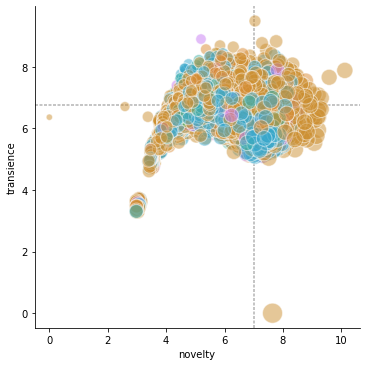

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

party_colours = {'LP': 'blue', 'ALP': 'red', 'AG': 'green', 'Nat': 'brown', 'grey': 'grey', 'IND': 'purple'}

# Use the 'hue' argument to provide a factor variable
sns.relplot(x="novelty", y="transience", data=df, hue='party', alpha=0.5, #palette = party_colours,
            size="resonance", sizes = (40,400),
            legend=False)

plt.axvline(x = n_50, color=".7", dashes=(2, 1), zorder=0)
plt.axhline(y = t_50, color=".7", dashes=(2, 1), zorder=0)

In [53]:
df.nlargest(20, 'resonance')

,date_time,chamber,parliament,session,period,page,name,name_id,party,in_gov,...,context,context_title,context_type,speech_type,probs,token_count,novelty,transience,resonance,text
248118,2013-06-28 15:28:00.000000,Senate,43,1,9,0,"Singh, Sen Lisa",M0R,ALP,False,...,debate,adjournment,adjournment,speech,"[7.83e-06, 1.512e-05, 1.095e-05, 1.191e-05, 7....",1010,7.641134,0.000000,7.641134,\n \n \n \n...
216076,2011-08-16 19:55:00.000040,Senate,43,1,4,0,"Hogg, Sen John",7L6,ALP,False,...,debate,questions on notice,questions on notice,answer,"[6.2e-07, 0.00200127, 8.7e-07, 9.5e-07, 0.0004...",16,9.067104,5.534966,3.532138,\n\nI will ask if the minister can tell me tod...
224441,2012-02-08 19:04:00.000044,Reps,43,1,5,0,"Emerson, Craig, MP",83V,ALP,False,...,debate,questions in writing,questions in writing,answer,"[1.03e-06, 0.00064366, 1.43e-06, 1.56e-06, 1e-...",236,9.145981,5.756947,3.389034,\n \n \n \n ...
220532,2011-10-12 17:42:00.000018,Reps,43,1,4,0,"Roxon, Nicola, MP",83K,ALP,False,...,debate,questions in writing,questions in writing,answer,"[1.72e-06, 0.00346297, 2.41e-06, 0.00865145, 1...",44,9.199883,5.953042,3.246842,\n \n \n \n ...
236627,2012-10-09 17:06:00.000000,Senate,43,1,7,0,"Farrell, Sen Don",I0N,ALP,False,...,debate,committees,committees,speech,"[1.17e-06, 0.00696926, 0.00245333, 1.79e-06, 1...",430,8.811691,5.636943,3.174748,\n \n \n \n ...
213024,2011-06-14 12:37:00.000001,Senate,43,1,3,0,"Farrell, Sen Don",I0N,ALP,False,...,debate,bills,bills,speech,"[5e-07, 0.00089072, 7.1e-07, 7.7e-07, 4.9e-07,...",207,8.412047,5.317458,3.094590,\n \n \n \n ...
238757,2012-11-20 23:54:00.000011,Senate,43,1,7,0,"Ludwig, Sen Joe",84N,ALP,False,...,debate,questions on notice,questions on notice,answer,"[1.34e-06, 2.59e-06, 1.87e-06, 2.04e-06, 1.31e...",27,8.650373,5.677068,2.973306,\n \n \n \n ...
247215,2013-06-20 15:51:00.000000,Senate,43,1,9,0,"Lundy, Sen Kate",7G6,ALP,False,...,debate,committees,committees,speech,"[0.00289524, 0.00095891, 0.00490282, 7.8e-07, ...",483,8.819682,5.895424,2.924258,\n \n \n \n...
246952,2013-06-19 17:14:00.000000,Senate,43,1,9,0,"Lundy, Sen Kate",7G6,ALP,False,...,debate,bills,bills,speech,"[1.23e-06, 2.37e-06, 0.00194673, 1.87e-06, 1.2...",36,8.722879,5.807593,2.915287,\n \n \n \n ...
219891,2011-09-22 15:44:00.000000,Senate,43,1,4,0,"Wong, Sen Penny",00AOU,ALP,False,...,debate,committees,committees,speech,"[1.5e-06, 2.9e-06, 2.1e-06, 2.29e-06, 1.47e-06...",11,8.617035,5.761518,2.855517,\n \n \n \n ...


In [54]:
# top twenties

for idx,row in df.nlargest(20, 'resonance').iterrows():
    print(row['date_time'], row['name'], row['party'], row['text'][:2000])

2013-06-28 15:28:00 Singh, Sen Lisa ALP 
            
              
            
              
                
                  
                    
                        (
                
                
                  What we have here are some elements from those much more comprehensive reports and much more detailed and considered recommendations. What we have here is a diminished and partial set of proposalssome of them derived from the Convergence Review, some of them grabbed from remnants of the Finkelstein report and some of them plucked from somewhere else and bundled into this overarching but nonetheless diminished package. We have been working around the clock since the announcement was made that these bills would be tabled to understand how they would operate in the real world, quite practically, and how they can be improved. It has put enormous pressure on staffnot just ours but the coalition's and the crossbenchers' both here and in the other placecommittee se